# Fathead Minnow

In [1]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Fathead Minnow'][
    ['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

X_train = db.loc[(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy().reset_index(drop=True)
y_train = multiclass_encoding(X_train['conc1_mean'].copy())

X_test = db.loc[~(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis = 1)].copy().reset_index(drop=True)
y_test = multiclass_encoding(X_test['conc1_mean'].copy())

categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
X_train.drop(columns = categorical, inplace = True)
X_test.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

minmax = MinMaxScaler()
minmax.fit(X_train[numerical])

new_train = X_train.copy()
new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

new_test = X_test.copy()
new_test.loc[:, numerical] = minmax.transform(X_test[numerical])

# KNN

1 3 5 7 9 11 13 15 17 19 21 31 


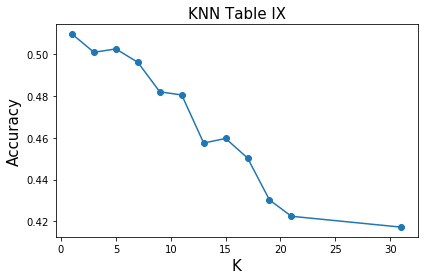

In [3]:
metrics = pd.DataFrame(index = ['Acc',
                                'Sens (micro)', 'Sens (macro)', 'Sens (weighted)',
                                'Prec (micro)', 'Prec (macro)', 'Prec (weighted)',
                                'F1 (micro)', 'F1 (macro)', 'F1 (weighted)'])
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    print(k, end = ' ')
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(new_test)
    
    metrics = pd.concat([ metrics,
                         pd.DataFrame([accuracy_score(y_test, y_pred),
                                       
                                       recall_score(y_test, y_pred, average = 'micro'),
                                       recall_score(y_test, y_pred, average = 'macro'),
                                       recall_score(y_test, y_pred, average = 'weighted'),
                                       
                                       precision_score(y_test, y_pred, average = 'micro'),
                                       precision_score(y_test, y_pred, average = 'macro'),
                                       precision_score(y_test, y_pred, average = 'weighted'),
                                       
                                       f1_score(y_test, y_pred, average = 'micro'),
                                       f1_score(y_test, y_pred, average = 'macro'),
                                       f1_score(y_test, y_pred, average = 'weighted')], 
                                                index = ['Acc',
                                'Sens (micro)', 'Sens (macro)', 'Sens (weighted)',
                                'Prec (micro)', 'Prec (macro)', 'Prec (weighted)',
                                'F1 (micro)', 'F1 (macro)', 'F1 (weighted)'])], axis = 1)

print('')
metrics = metrics.T.reset_index(drop=True)
metrics['K'] = pd.Series([1,3,5,7,9,11,13,15,17,19,21,31])

import matplotlib.pyplot as plt

plt.plot(metrics['K'], metrics['Acc'], '-o')
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('KNN Table IX', fontsize = 15)
plt.tight_layout()

In [4]:
metrics

,Acc,Sens (micro),Sens (macro),Sens (weighted),Prec (micro),Prec (macro),Prec (weighted),F1 (micro),F1 (macro),F1 (weighted),K
0,0.509596,0.509596,0.510848,0.509596,0.509596,0.523552,0.528630,0.509596,0.513313,0.515019,1
1,0.500867,0.500867,0.503215,0.500867,0.500867,0.522179,0.529688,0.500867,0.503858,0.506531,3
2,0.502486,0.502486,0.504965,0.502486,0.502486,0.515435,0.522932,0.502486,0.503247,0.505974,5
3,0.496069,0.496069,0.500120,0.496069,0.496069,0.506028,0.514062,0.496069,0.498249,0.500680,7
4,0.481963,0.481963,0.488117,0.481963,0.481963,0.492005,0.500595,0.481963,0.484237,0.486342,9
5,0.480460,0.480460,0.487483,0.480460,0.480460,0.487105,0.498065,0.480460,0.481347,0.484415,11
6,0.457452,0.457452,0.463815,0.457452,0.457452,0.458010,0.467266,0.457452,0.453528,0.456364,13
7,0.459649,0.459649,0.464698,0.459649,0.459649,0.460532,0.468638,0.459649,0.457604,0.460060,15
8,0.450283,0.450283,0.455536,0.450283,0.450283,0.450413,0.460106,0.450283,0.446766,0.450309,17
9,0.430223,0.430223,0.436068,0.430223,0.430223,0.435370,0.446248,0.430223,0.427689,0.431921,19


# Random forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterSampler

hyper_params_tune = {'max_depth' : [i for i in range(10,20,2)],
                     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 11)],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}

params_comb = list(ParameterSampler(hyper_params_tune, n_iter = 100, random_state = 52))

best_acc = 0

best_sens_micro = 0
best_sens_macro = 0
best_sens_weight = 0

best_precs_micro = 0
best_precs_macro = 0
best_precs_weight = 0

best_f1s_micro = 0
best_f1s_macro = 0
best_f1s_weight = 0


best_p = dict()
print(ctime())
for i in range(0, len(params_comb)):
    
    rfc = RandomForestClassifier(n_jobs = -1)

    for k,v in params_comb[i].items():
        setattr(rfc, k, v)
        
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    
    sens_micro = recall_score(y_test, y_pred, average = 'micro')
    sens_macro = recall_score(y_test, y_pred, average = 'macro')
    sens_weight = recall_score(y_test, y_pred, average = 'weighted')
    
    precs_micro = precision_score(y_test, y_pred, average = 'micro')
    precs_macro = precision_score(y_test, y_pred, average = 'macro')
    precs_weight = precision_score(y_test, y_pred, average = 'weighted')
    
    f1s_micro = f1_score(y_test, y_pred, average = 'micro')
    f1s_macro = f1_score(y_test, y_pred, average = 'macro')
    f1s_weight = f1_score(y_test, y_pred, average = 'weighted')
    
    if acc > best_acc:
        best_p = params_comb[i]
        best_acc = acc

        best_sens_micro = sens_micro
        best_sens_macro = sens_macro
        best_sens_weight = sens_weight

        best_precs_micro = precs_micro
        best_precs_macro = precs_macro
        best_precs_weight = precs_weight

        best_f1s_micro = f1s_micro
        best_f1s_macro = f1s_macro
        best_f1s_weight = f1s_weight

print(ctime())
print(f'Model: {best_p}')

print('Accuracy:            ', best_acc, end = '\n\n')

print('Micro Recall:        ', best_sens_micro)
print('Macro Recall:        ', best_sens_macro)
print('Weighted Recall:     ', best_sens_weight, end = '\n\n')

print('Micro Precision:     ', best_precs_micro)
print('Macro Precision:     ', best_precs_macro)
print('Weighted Precision:  ', best_precs_weight, end = '\n\n')

print('Micro F1:            ', best_f1s_micro)
print('Macro F1:            ', best_f1s_macro)
print('Weighted F1:         ', best_f1s_weight)

Thu May  6 10:23:14 2021
Thu May  6 10:33:56 2021
Model: {'n_estimators': 920, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 18}
Accuracy:             0.5407561567811308

Micro Recall:         0.5407561567811308
Macro Recall:         0.5437252411290127
Weighted Recall:      0.5407561567811308

Micro Precision:      0.5407561567811308
Macro Precision:      0.5467809366610823
Weighted Precision:   0.5468030020360778

Micro F1:             0.5407561567811308
Macro F1:             0.5427808293939542
Weighted F1:          0.5413474693649254


# Simple RASAR

In [4]:
from helper_rasar_simple_multiclass import *

df_rasar_train, df_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

clf = LogisticRegression(n_jobs = -1)
clf.fit(df_rasar_train, y_train)
y_pred = clf.predict(df_rasar_test)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy:             0.5019655451497282

Micro Recall:         0.5019655451497282
Macro Recall:         0.5081249060511719
Weighted Recall:      0.5019655451497282

Micro Precision:      0.5019655451497282
Macro Precision:      0.5049896524197746
Weighted Precision:   0.5127183808134608

Micro F1:             0.5019655451497282
Macro F1:             0.5025635422122072
Weighted F1:          0.5041024612726861


In [2]:
# Random Forest
from helper_rasar_simple_multiclass import *

df_rasar_train, df_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

clf = RandomForestClassifier(n_jobs = -1)
clf.fit(df_rasar_train, y_train)
y_pred = clf.predict(df_rasar_test)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy:             0.5148572089258874

Micro Recall:         0.5148572089258874
Macro Recall:         0.5166434085030842
Weighted Recall:      0.5148572089258874

Micro Precision:      0.5148572089258874
Macro Precision:      0.5132750905177617
Weighted Precision:   0.5226175163610424

Micro F1:             0.5148572089258874
Macro F1:             0.5111270756828237
Weighted F1:          0.515710712152214


# Data Fusion RASAR

In [5]:
from helper_rasar_datafusion import *
from helper_rasar_simple_multiclass import *

def create_label_rasar_multiclass(path_mortality, path_datafusion):
    
    db = pd.read_csv(path_mortality).drop(columns = 'Unnamed: 0')
    df = pd.read_csv(path_datafusion).drop(columns = 'Unnamed: 0')
    
    df['fish'] = df['class'] + ' ' + df['tax_order'] + ' ' + df['family'] + ' ' + df['genus'] + ' ' + df['species']
    
    db['target'] = multiclass_encoding(db['conc1_mean'].copy())
    df['target'] = multiclass_encoding(df['conc1_mean'].copy())
    
    comparing = ['test_cas', 'obs_duration_mean', 'conc1_type', 'exposure_type', 'control_type', 'media_type',
             'application_freq_unit', 'fish']

    grouped_datafusion = df.groupby(by=['endpoint', 'effect'])

    db_datafusion_rasar_label = pd.DataFrame()

    for g in grouped_datafusion.groups:
        name = g[0] + '_' + g[1] + '_' + 'label'

        group = grouped_datafusion.get_group(g).drop(columns = ['endpoint', 'effect'])
    
        db_datafusion_rasar_label[name] = db.apply(
            lambda x: find_similar_exp(x, group, comparing), axis = 1).reset_index(drop = True)
        
    return db_datafusion_rasar_label

db_label = create_label_rasar_multiclass('lc_db_processed.csv', 'datafusion_db_processed.csv')

In [33]:
from helper_rasar_simple_multiclass import *

db_df = pd.read_csv('datafusion_db_processed.csv').drop(columns = 'Unnamed: 0')

db_df = pd.concat([db_df,
                    pd.DataFrame(pd.DataFrame(db_df['pubchem2d'].values).\
                                 apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                            axis = 1)[0].to_list(),
                       columns = ['pub'+ str(i) for i in range(1,882)])],
                   axis = 1)

new_db_df = db_df.copy()
new_db_df.loc[:, numerical] = minmax.transform(db_df[numerical])

for ef in new_db_df.effect.unique():
    conc = new_db_df.loc[new_db_df.effect == ef, 'conc1_mean'].copy()
    new_db_df.loc[new_db_df.effect == ef, 'target'] = multiclass_encoding(conc.values,
                                                                          conc.quantile([.2,.4,.6,.8]).values)

categorical.remove('fish')
new_db_df.drop(columns = categorical, inplace = True)

# Simple RASAR 
db_simple_rasar_train, db_simple_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

print('Making df rasar db')
# DF RASAR
db_datafusion_rasar_train = df_datafusion_rasar(new_db_df, new_train)
db_datafusion_rasar_test = df_datafusion_rasar(new_db_df, new_test)

# FINAL DB
X_train_rasar = pd.concat([db_simple_rasar_train, db_datafusion_rasar_train,
                           db_label.iloc[new_train.index].reset_index(drop = True)], axis = 1)
X_test_rasar = pd.concat([db_simple_rasar_test, db_datafusion_rasar_test,
                          db_label.iloc[new_test.index].reset_index(drop = True)], axis = 1)

In [41]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train_rasar, y_train)
y_pred = clf.predict(X_test_rasar)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy:             0.5200023124060585

Micro Recall:         0.5200023124060585
Macro Recall:         0.5181730991481599
Weighted Recall:      0.5200023124060585

Micro Precision:      0.5200023124060585
Macro Precision:      0.5205371742215786
Weighted Precision:   0.5290085664796594

Micro F1:             0.5200023124060585
Macro F1:             0.5158180204562266
Weighted F1:          0.5213142767445597


# Rainbow Trout

In [44]:
from helper_knn import *

db = pd.read_csv('lc_db_processed.csv').drop(columns = 'Unnamed: 0')

db = pd.concat([db,
                pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).\
                             apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])],
               axis = 1)

species = pd.read_csv('C:/Users/Simone/Desktop/Utilità tesi magistrale/data/species.txt', sep = '\|', engine = 'python')

fm = species[species['common_name'] == 'Rainbow Trout'][
    ['class', 'tax_order', 'family', 'genus', 'species']].values.ravel()

X_train = db.loc[(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis =1)].copy().reset_index(drop=True)
y_train = multiclass_encoding(X_train['conc1_mean'].copy())

X_test = db.loc[~(db[
    ['class', 'tax_order', 'family', 'genus', 'species']] == fm).all(axis = 1)].copy().reset_index(drop=True)
y_test = multiclass_encoding(X_test['conc1_mean'].copy())

categorical = ['test_cas', 'fish', 'smiles', 'pubchem2d', 'conc1_mean', 'obs_duration_mean',
               'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']
X_train.drop(columns = categorical, inplace = True)
X_test.drop(columns = categorical, inplace = True)

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

minmax = MinMaxScaler()
minmax.fit(X_train[numerical])

new_train = X_train.copy()
new_train.loc[:, numerical] = minmax.transform(X_train[numerical])

new_test = X_test.copy()
new_test.loc[:, numerical] = minmax.transform(X_test[numerical])

# KNN

1 3 5 7 9 11 13 15 17 19 21 31 


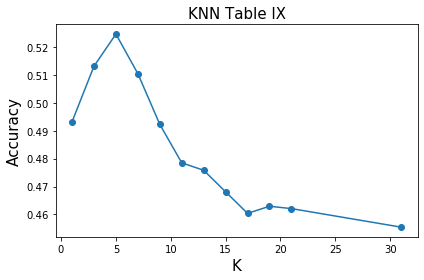

In [2]:
metrics = pd.DataFrame(index = ['Acc',
                                'Sens (micro)', 'Sens (macro)', 'Sens (weighted)',
                                'Prec (micro)', 'Prec (macro)', 'Prec (weighted)',
                                'F1 (micro)', 'F1 (macro)', 'F1 (weighted)'])
for k in [1,3,5,7,9,11,13,15,17,19,21,31]:
    print(k, end = ' ')
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(new_test)
    
    metrics = pd.concat([ metrics,
                         pd.DataFrame([accuracy_score(y_test, y_pred),
                                       
                                       recall_score(y_test, y_pred, average = 'micro'),
                                       recall_score(y_test, y_pred, average = 'macro'),
                                       recall_score(y_test, y_pred, average = 'weighted'),
                                       
                                       precision_score(y_test, y_pred, average = 'micro'),
                                       precision_score(y_test, y_pred, average = 'macro'),
                                       precision_score(y_test, y_pred, average = 'weighted'),
                                       
                                       f1_score(y_test, y_pred, average = 'micro'),
                                       f1_score(y_test, y_pred, average = 'macro'),
                                       f1_score(y_test, y_pred, average = 'weighted')], 
                                                index = ['Acc',
                                'Sens (micro)', 'Sens (macro)', 'Sens (weighted)',
                                'Prec (micro)', 'Prec (macro)', 'Prec (weighted)',
                                'F1 (micro)', 'F1 (macro)', 'F1 (weighted)'])], axis = 1)

print('')
metrics = metrics.T.reset_index(drop=True)
metrics['K'] = pd.Series([1,3,5,7,9,11,13,15,17,19,21,31])

import matplotlib.pyplot as plt

plt.plot(metrics['K'], metrics['Acc'], '-o')
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('KNN Table IX', fontsize = 15)
plt.tight_layout()

In [3]:
metrics

,Acc,Sens (micro),Sens (macro),Sens (weighted),Prec (micro),Prec (macro),Prec (weighted),F1 (micro),F1 (macro),F1 (weighted),K
0,0.493190,0.493190,0.494614,0.493190,0.493190,0.495333,0.489872,0.493190,0.487234,0.484345,1
1,0.513110,0.513110,0.511292,0.513110,0.513110,0.508312,0.504360,0.513110,0.499727,0.498783,3
2,0.524631,0.524631,0.525124,0.524631,0.524631,0.524016,0.519406,0.524631,0.517327,0.514826,5
3,0.510443,0.510443,0.508458,0.510443,0.510443,0.507167,0.503982,0.510443,0.497790,0.497473,7
4,0.492281,0.492281,0.487717,0.492281,0.492281,0.489264,0.484533,0.492281,0.477966,0.478064,9
5,0.478490,0.478490,0.477058,0.478490,0.478490,0.474886,0.469739,0.478490,0.466849,0.465341,11
6,0.475823,0.475823,0.471618,0.475823,0.475823,0.473368,0.466211,0.475823,0.463188,0.462198,13
7,0.468104,0.468104,0.467867,0.468104,0.468104,0.467964,0.460352,0.468104,0.461921,0.458324,15
8,0.460386,0.460386,0.458182,0.460386,0.460386,0.460451,0.453141,0.460386,0.452468,0.450080,17
9,0.462940,0.462940,0.460100,0.462940,0.462940,0.465113,0.456989,0.462940,0.456178,0.453645,19


# Random forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterSampler

hyper_params_tune = {'max_depth' : [i for i in range(10,20,2)],
                     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 11)],
                     'min_samples_split': [2, 5, 10],
                     'min_samples_leaf': [1, 2, 4]}

params_comb = list(ParameterSampler(hyper_params_tune, n_iter = 100, random_state = 52))

best_acc = 0

best_sens_micro = 0
best_sens_macro = 0
best_sens_weight = 0

best_precs_micro = 0
best_precs_macro = 0
best_precs_weight = 0

best_f1s_micro = 0
best_f1s_macro = 0
best_f1s_weight = 0


best_p = dict()
print(ctime())
for i in range(0, len(params_comb)):
    
    rfc = RandomForestClassifier(n_jobs = -1)

    for k,v in params_comb[i].items():
        setattr(rfc, k, v)
        
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    
    acc = accuracy_score(y_test, y_pred)
    
    sens_micro = recall_score(y_test, y_pred, average = 'micro')
    sens_macro = recall_score(y_test, y_pred, average = 'macro')
    sens_weight = recall_score(y_test, y_pred, average = 'weighted')
    
    precs_micro = precision_score(y_test, y_pred, average = 'micro')
    precs_macro = precision_score(y_test, y_pred, average = 'macro')
    precs_weight = precision_score(y_test, y_pred, average = 'weighted')
    
    f1s_micro = f1_score(y_test, y_pred, average = 'micro')
    f1s_macro = f1_score(y_test, y_pred, average = 'macro')
    f1s_weight = f1_score(y_test, y_pred, average = 'weighted')
    
    if acc > best_acc:
        best_p = params_comb[i]
        best_acc = acc

        best_sens_micro = sens_micro
        best_sens_macro = sens_macro
        best_sens_weight = sens_weight

        best_precs_micro = precs_micro
        best_precs_macro = precs_macro
        best_precs_weight = precs_weight

        best_f1s_micro = f1s_micro
        best_f1s_macro = f1s_macro
        best_f1s_weight = f1s_weight

print(ctime())
print(f'Model: {best_p}')

print('Accuracy:            ', best_acc, end = '\n\n')

print('Micro Recall:        ', best_sens_micro)
print('Macro Recall:        ', best_sens_macro)
print('Weighted Recall:     ', best_sens_weight, end = '\n\n')

print('Micro Precision:     ', best_precs_micro)
print('Macro Precision:     ', best_precs_macro)
print('Weighted Precision:  ', best_precs_weight, end = '\n\n')

print('Micro F1:            ', best_f1s_micro)
print('Macro F1:            ', best_f1s_macro)
print('Weighted F1:         ', best_f1s_weight)

Thu May  6 10:41:04 2021
Thu May  6 10:53:49 2021
Model: {'n_estimators': 680, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 14}
Accuracy:             0.5485811577752554

Micro Recall:         0.5485811577752554
Macro Recall:         0.5451273416416709
Weighted Recall:      0.5485811577752554

Micro Precision:      0.5485811577752554
Macro Precision:      0.5579716936603097
Weighted Precision:   0.548133450787278

Micro F1:             0.5485811577752554
Macro F1:             0.5431980499649429
Weighted F1:          0.5404587464268362


# Simple RASAR

In [2]:
from helper_rasar_simple_multiclass import *

df_rasar_train, df_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

clf = LogisticRegression(n_jobs = -1)
clf.fit(df_rasar_train, y_train)
y_pred = clf.predict(df_rasar_test)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy:             0.4804199772985244

Micro Recall:         0.4804199772985244
Macro Recall:         0.47010074572146243
Weighted Recall:      0.4804199772985244

Micro Precision:      0.4804199772985244
Macro Precision:      0.4901126105696343
Weighted Precision:   0.4793571584472678

Micro F1:             0.4804199772985244
Macro F1:             0.45220466597394554
Weighted F1:          0.4544318562869385


In [3]:
from helper_rasar_simple_multiclass import *

df_rasar_train, df_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

clf = RandomForestClassifier(n_jobs = -1)
clf.fit(df_rasar_train, y_train)
y_pred = clf.predict(df_rasar_test)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy:             0.5265039727582292

Micro Recall:         0.5265039727582292
Macro Recall:         0.5189741599708328
Weighted Recall:      0.5265039727582292

Micro Precision:      0.5265039727582292
Macro Precision:      0.5280595198342459
Weighted Precision:   0.5230642401742082

Micro F1:             0.5265039727582292
Macro F1:             0.5158172819679485
Weighted F1:          0.5183065883979093


# Data Fusion RASAR

In [ ]:
from helper_rasar_datafusion import *
from helper_rasar_simple_multiclass import *

def create_label_rasar_multiclass(path_mortality, path_datafusion):
    
    db = pd.read_csv(path_mortality).drop(columns = 'Unnamed: 0')
    df = pd.read_csv(path_datafusion).drop(columns = 'Unnamed: 0')
    
    df['fish'] = df['class'] + ' ' + df['tax_order'] + ' ' + df['family'] + ' ' + df['genus'] + ' ' + df['species']
    
    db['target'] = multiclass_encoding(db['conc1_mean'].copy())
    df['target'] = multiclass_encoding(df['conc1_mean'].copy())
    
    comparing = ['test_cas', 'obs_duration_mean', 'conc1_type', 'exposure_type', 'control_type', 'media_type',
             'application_freq_unit', 'fish']

    grouped_datafusion = df.groupby(by=['endpoint', 'effect'])

    db_datafusion_rasar_label = pd.DataFrame()

    for g in grouped_datafusion.groups:
        name = g[0] + '_' + g[1] + '_' + 'label'

        group = grouped_datafusion.get_group(g).drop(columns = ['endpoint', 'effect'])
    
        db_datafusion_rasar_label[name] = db.apply(
            lambda x: find_similar_exp(x, group, comparing), axis = 1).reset_index(drop = True)
        
    return db_datafusion_rasar_label

db_label = create_label_rasar_multiclass('lc_db_processed.csv', 'datafusion_db_processed.csv')

In [45]:
db_df = pd.read_csv('datafusion_db_processed.csv').drop(columns = 'Unnamed: 0')

db_df = pd.concat([db_df,
                    pd.DataFrame(pd.DataFrame(db_df['pubchem2d'].values).\
                                 apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '), 
                                                                            axis = 1)[0].to_list(),
                       columns = ['pub'+ str(i) for i in range(1,882)])],
                   axis = 1)

new_db_df = db_df.copy()
new_db_df.loc[:, numerical] = minmax.transform(db_df[numerical])

for ef in new_db_df.effect.unique():
    conc = new_db_df.loc[new_db_df.effect == ef, 'conc1_mean'].copy()
    new_db_df.loc[new_db_df.effect == ef, 'target'] = multiclass_encoding(conc.values,
                                                                          conc.quantile([.2,.4,.6,.8]).values)

categorical.remove('fish')
new_db_df.drop(columns = categorical, inplace = True)

# Simple RASAR 
db_simple_rasar_train, db_simple_rasar_test = unsuper_simple_rasar_multiclass(new_train, new_test, y_train, y_test)

print('Making df rasar db')
# DF RASAR
db_datafusion_rasar_train = df_datafusion_rasar(new_db_df, new_train)
db_datafusion_rasar_test = df_datafusion_rasar(new_db_df, new_test)

# FINAL DB
X_train_rasar = pd.concat([db_simple_rasar_train, db_datafusion_rasar_train,
                           db_label.iloc[new_train.index].reset_index(drop = True)], axis = 1)
X_test_rasar = pd.concat([db_simple_rasar_test, db_datafusion_rasar_test,
                          db_label.iloc[new_test.index].reset_index(drop = True)], axis = 1)


clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train_rasar, y_train)
y_pred = clf.predict(X_test_rasar)

print('Accuracy:            ', accuracy_score(y_test, y_pred), end = '\n\n')

print('Micro Recall:        ', recall_score(y_test, y_pred, average = 'micro'))
print('Macro Recall:        ', recall_score(y_test, y_pred, average = 'macro'))
print('Weighted Recall:     ', recall_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro Precision:     ', precision_score(y_test, y_pred, average = 'micro'))
print('Macro Precision:     ', precision_score(y_test, y_pred, average = 'macro'))
print('Weighted Precision:  ', precision_score(y_test, y_pred, average = 'weighted'), end = '\n\n')

print('Micro F1:            ', f1_score(y_test, y_pred, average = 'micro'))
print('Macro F1:            ', f1_score(y_test, y_pred, average = 'macro'))
print('Weighted F1:         ', f1_score(y_test, y_pred, average = 'weighted'))

Making df rasar db
Accuracy:             0.5197502837684449

Micro Recall:         0.5197502837684449
Macro Recall:         0.5144560343328729
Weighted Recall:      0.5197502837684449

Micro Precision:      0.5197502837684449
Macro Precision:      0.533522685797434
Weighted Precision:   0.523635723961782

Micro F1:             0.5197502837684449
Macro F1:             0.5128861545793227
Weighted F1:          0.5129618616778964
